# Spark integration

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os, sys
import numpy as np
import pandas as pd
from IPython.display import display
sys.path.append(os.path.abspath(os.path.join('../..')))

import plot.data
from plot import pyplot as plt
from database.CERNMongoClient import CERNMongoClient
from database.CERNSparkClient import CERNSparkClient

# auto-load changes in imported modules
%autoreload 2

## Demo of working data retrieval

In [3]:
dbm = CERNMongoClient()
dbs = CERNSparkClient(spark,sc)

In [ ]:
df=dbs.query("MKI.*5L2.B1:TEMP_MAGNET_UP$",spark,filters=True)

In [ ]:
plot.data.continuous(df, "TEMP_MAGNET_UP", filename="../TEMP_MAGNET_UP")

## Retrieve state and control variables

In [ ]:
state_control        = dbs.query("MKI.UA23.STATE:CONTROL",spark,end="2016-11-28 00:00:00")
state_mode           = dbs.query("MKI.UA23.STATE:MODE",spark,end="2016-11-28 00:00:00")
logs                 = dbs.query_elogbook(start="2016-03-21 00:00:00", end="2016-11-28 00:00:00")
state_status         = dbs.query("MKI.UA23.STATE:STATUS",spark,end="2016-11-28 00:00:00")
state_softstartstate = dbs.query("MKI.UA23.STATE:SOFTSTARTSTATE",spark,end="2016-11-28 00:00:00")

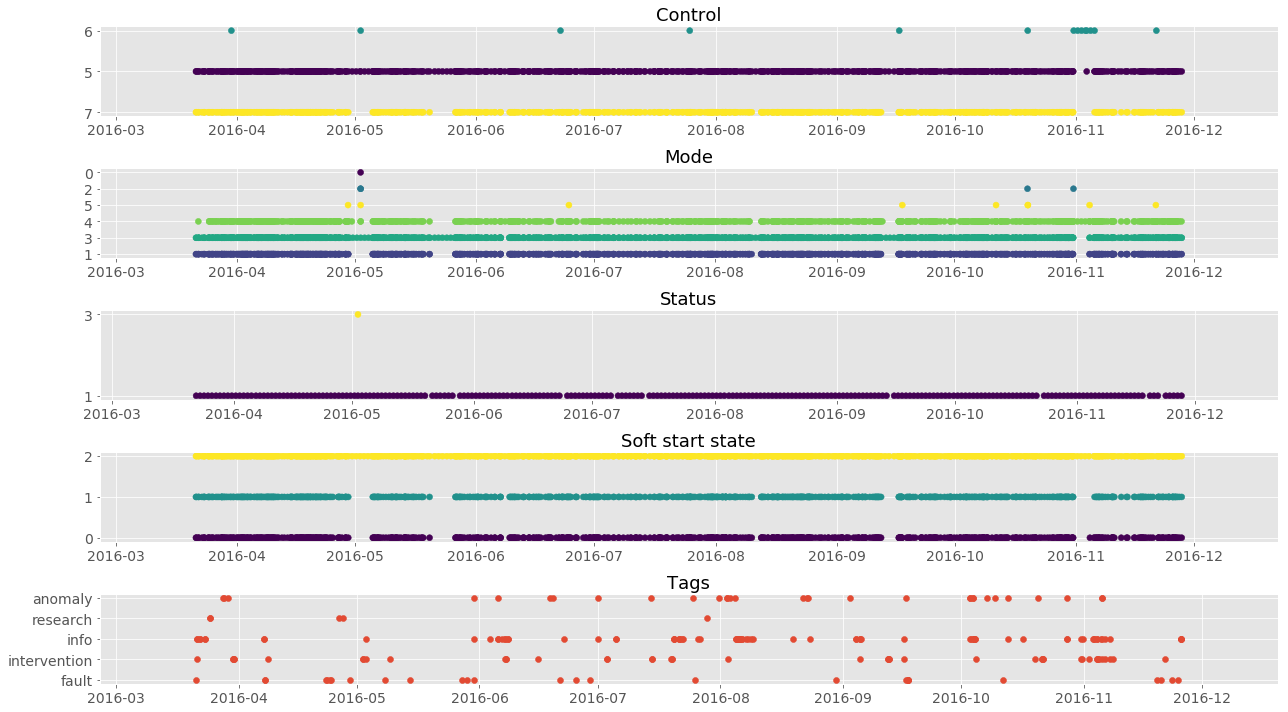

<Figure size 1080x576 with 0 Axes>

In [35]:
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(18,10))

ax = plt.subplot(5, 1, 1)
ax.set_title("Control")
ax.scatter(state_control.index, state_control['MKI.UA23.STATE:CONTROL'], c=state_control['MKI.UA23.STATE:CONTROL'])

ax = plt.subplot(5, 1, 2)
ax.set_title("Mode")
ax.scatter(state_mode.index, state_mode['MKI.UA23.STATE:MODE'], c=state_mode['MKI.UA23.STATE:MODE'])

ax = plt.subplot(5, 1, 3)
ax.set_title("Status")
ax.scatter(state_status.index, state_status['MKI.UA23.STATE:STATUS'], c=state_status['MKI.UA23.STATE:STATUS'])

ax = plt.subplot(5, 1, 4)
ax.set_title("Soft start state")
ax.scatter(state_softstartstate.index, state_softstartstate['MKI.UA23.STATE:SOFTSTARTSTATE'], c=state_softstartstate['MKI.UA23.STATE:SOFTSTARTSTATE'])

ax = plt.subplot(5, 1, 5)
ax.set_title("Tags")
ax.scatter(logs['TAG'].index,logs['TAG'])

plt.tight_layout()
plt.show()
plt.savefig('state.png')

## Minimal example with dataframes

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
schemaB = StructType([StructField("new_time", IntegerType(), False), StructField("B", IntegerType(), False)])
schemaD = StructType([StructField("new_time", IntegerType(), False), StructField("D", IntegerType(), False)])
df_b = spark.createDataFrame([[1,10],[3,20]],schemaB)
df_d = spark.createDataFrame([[2,30],[5,40]],schemaD)
df_b = df_b.join(df_d,'new_time',how='full')
df_b.show()

In [ ]:
from pyspark.sql import functions
df_b = df_b.sort(functions.col("new_time").asc())
df_b = df_b.toPandas().set_index('new_time')
df_b.index = df_b.index.astype('datetime64[ns]')
display(df_b)